Epoch : 0 Cost : 0.20335059
Epoch : 100 Cost : 0.2362141
Epoch : 200 Cost : 0.24779128
Epoch : 300 Cost : 0.24980278
Epoch : 400 Cost : 0.25076073
Cost : 0.2508591


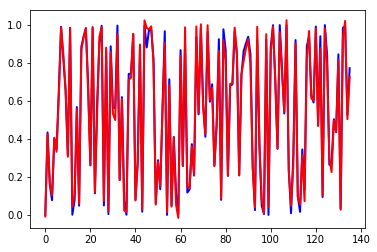

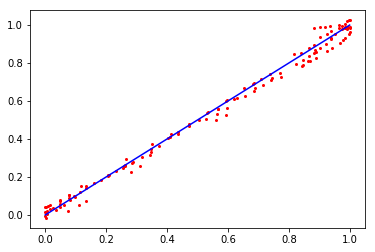

In [56]:
import numpy as np
import tensorflow as tf
import random
import math as m
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

pi = 22.0/7.0
alpha = 0.01

x = np.arange(50, 54.1, 0.01)
X = np.column_stack((x, x))
y = np.multiply(np.cos(pi * x), np.cos(pi * x))
num_features = 2
#d = {'x1': x, 'x2': x, 'y': f_true}
#df = pd.DataFrame(d)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

def neural_net_model(X_data,input_dim):
    num_hidden = 50
    
    W_1 = tf.Variable(tf.random_normal([input_dim,num_hidden]))
    b_1 = tf.Variable(tf.zeros([num_hidden]))
    layer_1 = tf.add(tf.matmul(X_data,W_1), b_1)
    layer_1 = tf.nn.tanh(layer_1)

    # layer 1 multiplying and adding bias then activation function
    W_2 = tf.Variable(tf.random_normal([num_hidden,num_hidden]))
    b_2 = tf.Variable(tf.zeros([num_hidden]))
    layer_2 = tf.add(tf.matmul(layer_1,W_2), b_2)
    layer_2 = tf.nn.tanh(layer_2)
    
    # layer 2 multiplying and adding bias then activation function
    W_O = tf.Variable(tf.random_normal([num_hidden,1]))
    b_O = tf.Variable(tf.zeros([1]))
    output = tf.add(tf.matmul(layer_2,W_O), b_O)
    # O/p layer multiplying and adding bias then activation function
    return output,W_O

xs = tf.placeholder(tf.float32,name='features')
ys = tf.placeholder(tf.float32,name='labels')
output,W_O = neural_net_model(xs,num_features)
cost = tf.reduce_mean(tf.square(output-ys))
# our mean squared error cost function

num_iterations = 500
alpha = 0.001
train = tf.train.GradientDescentOptimizer(alpha).minimize(cost)
#train = tf.train.AdamOptimizer(alpha).minimize(cost)
# Gradinent Descent optimiztion just discussed above for updating weights and biases

c_t = [] #variable to save cost of training in each iteration
c_test = []
    
with tf.Session() as sess:
    # Initiate session and initialize all vaiables
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    
    for i in range(num_iterations):
        #sess.run([cost,train],feed_dict = {xs: X_train, ys: y_train})
        for j in range(X_train.shape[0]):
            sess.run([cost,train],feed_dict = {xs: X_train[j,:].reshape(1,num_features), ys: y_train[j]})
            # Run cost and train with each sample
        c_t.append(sess.run(cost, feed_dict={xs:X_train,ys:y_train}))
        c_test.append(sess.run(cost, feed_dict={xs:X_test,ys:y_test}))
        
        if i%100 == 0:
            print('Epoch :',i,'Cost :',c_t[i])
        
    
    pred = sess.run(output, feed_dict={xs:X_test})
    # predict output of test data after training
    print('Cost :',sess.run(cost, feed_dict={xs:X_test,ys:y_test}))
    #y_test = denormalize(df_test,y_test)
    #pred = denormalize(df_test,pred)
    #Denormalize data 
    
    plt.figure(1)
    plt.plot(range(y_test.shape[0]),y_test,'b-',markersize=2,linewidth=2,label="Original Data")
    plt.plot(range(y_test.shape[0]),pred,'r-',markersize=2,linewidth=2,label="Predicted Data")
    #plt.legend(loc='best')
    #plt.ylabel('Stock Value')
    #plt.xlabel('Days')
    #plt.title('Stock Market Nifty')
    
    plt.figure(2)
    plt.plot(y_test,pred,'ro',markersize=2)
    plt.plot(np.linspace(np.min(y_test), np.max(y_test)),np.linspace(np.min(y_test), np.max(y_test)),'b-')
    
    plt.show()
    
    '''
    if input('Save model ? [Y/N]') == 'Y':
        saver.save(sess,'yahoo_dataset.ckpt')
        print('Model Saved')
    '''
